<a href="https://colab.research.google.com/github/siglimumuni/Published-Articles/blob/main/Working_with_Time_Series_Data_in_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
#import pandas
import pandas as pd

#read the data
df = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/AirQuality")
#preview the first 5 rows
df.head()

,Timestamp,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [80]:
#data type before conversion
print("Before conversion: ",type(df["Timestamp"].loc[0]))

#converting to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

#data type after conversion
print("After conversion: ",type(df["Timestamp"].loc[0]))

Before conversion:  <class 'str'>
After conversion:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [42]:
#converting directly from read_csv
df = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/AirQuality",parse_dates=["Timestamp"])
print(type(df["Timestamp"].loc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [49]:
#latest timestamp
print(df["Timestamp"].max())

#earliest timestamp
print(df["Timestamp"].min())

#difference between timestamps
print(df["Timestamp"].max() - df["Timestamp"].min())

2005-04-04 14:00:00
2004-03-10 18:00:00
389 days 20:00:00


In [36]:
#extract year into new column
df["Year"] = df["Timestamp"].dt.year

#extract quarter into new column
df["Quarter"] = df["Timestamp"].dt.quarter

#extract month into new column
df["Month"] = df["Timestamp"].dt.month

#extract week number into new column
df["Week Number"] = df["Timestamp"].dt.weekofyear

df[["Timestamp","Year","Quarter","Month","Week Number"]].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


,Timestamp,Year,Quarter,Month,Week Number
0,2004-03-10 18:00:00,2004,1,3,11
1,2004-03-10 19:00:00,2004,1,3,11
2,2004-03-10 20:00:00,2004,1,3,11
3,2004-03-10 21:00:00,2004,1,3,11
4,2004-03-10 22:00:00,2004,1,3,11


In [37]:
#find average NO2 levels per day of week
df.groupby(df["Timestamp"].dt.day_name())["NO2(GT)"].mean()

Timestamp
Friday       123.434729
Monday       110.279768
Saturday     107.560811
Sunday        91.641106
Thursday     120.824799
Tuesday      117.384478
Wednesday    119.981367
Name: NO2(GT), dtype: float64

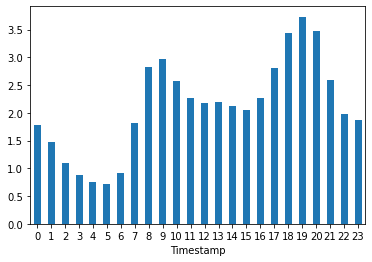

In [41]:
#plot average carbon monoxide levels per hour of day
df.groupby(df["Timestamp"].dt.hour)["CO(GT)"].mean().plot(kind="bar",rot=0)

In [74]:
#create filter for data in or after 2005
filter1 = (df["Timestamp"]>='2005')

#apply filter
year_2005 = df.loc[filter1]
year_2005

,Timestamp,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
7110,2005-01-01 00:00:00,NaN,1046.25,NaN,4.247511,724.25,NaN,848.00,NaN,897.75,1201.25,8.200,40.099999,0.437451
7111,2005-01-01 01:00:00,1.6,1274.50,NaN,8.763027,930.00,214.9,648.50,106.3,1023.50,1617.00,5.325,50.725000,0.456368
7112,2005-01-01 02:00:00,2.5,1172.75,NaN,7.498693,878.25,299.8,738.00,128.6,1002.00,1355.25,5.925,50.049999,0.468928
7113,2005-01-01 03:00:00,2.7,1162.50,NaN,7.563761,881.00,NaN,748.25,NaN,1001.25,1295.50,4.850,53.875000,0.469339
7114,2005-01-01 04:00:00,1.9,1054.00,NaN,5.560496,791.00,253.1,829.50,126.0,966.50,1131.00,4.325,55.325000,0.465048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04 11:00:00,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04 12:00:00,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04 13:00:00,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [75]:
#create filter
filter2 = (df["Timestamp"]>='2004-11-01') & (df["Timestamp"]<='2004-12-31')

#apply filter
nov_dec = df.loc[filter2]
nov_dec

,Timestamp,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
5646,2004-11-01 00:00:00,3.2,1352.50,NaN,15.864362,1175.50,318.0,583.50,69.0,1723.00,2149.75,20.075,71.299999,1.656382
5647,2004-11-01 01:00:00,3.7,1406.50,NaN,17.848492,1235.00,338.0,547.75,77.0,1780.00,2519.25,20.050,71.125000,1.649795
5648,2004-11-01 02:00:00,3.5,1333.00,NaN,16.685885,1200.50,353.0,552.00,68.0,1767.00,1925.25,19.625,73.200001,1.654350
5649,2004-11-01 03:00:00,3.0,1268.50,NaN,16.027251,1180.50,NaN,558.50,NaN,1756.00,1762.00,19.075,75.824999,1.656790
5650,2004-11-01 04:00:00,NaN,1252.50,NaN,16.877332,1206.25,291.0,540.25,52.0,1779.25,1579.00,18.450,77.949999,1.638866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7082,2004-12-30 20:00:00,NaN,1078.25,NaN,10.238144,986.50,NaN,718.25,NaN,1151.50,1014.75,9.275,41.700000,0.488401
7083,2004-12-30 21:00:00,NaN,951.50,NaN,5.498274,788.00,NaN,849.00,NaN,1018.00,875.50,8.700,44.325000,0.499821
7084,2004-12-30 22:00:00,NaN,882.25,NaN,3.120713,659.50,NaN,990.50,NaN,921.50,726.50,7.950,47.650000,0.511256
7085,2004-12-30 23:00:00,NaN,924.00,NaN,4.242878,724.00,NaN,946.25,NaN,968.50,780.75,7.675,47.224999,0.497510


In [81]:
#set the timestamp column as the index
df.set_index("Timestamp", inplace=True)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Timestamp,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [82]:
#filter 2004 data
df["2004"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Timestamp,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-12-31 19:00:00,NaN,929.50,NaN,5.344026,780.50,NaN,933.25,NaN,906.25,866.25,9.350,33.625000,0.395774
2004-12-31 20:00:00,NaN,962.00,NaN,5.338917,780.25,NaN,919.25,NaN,908.50,883.50,9.625,32.300000,0.387114
2004-12-31 21:00:00,NaN,974.25,NaN,5.544912,790.25,NaN,914.75,NaN,895.25,950.75,9.125,32.475000,0.376616


In [84]:
#filter for 6th January 2005
df["2005-01-06"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Timestamp,,,,,,,,,,,,,
2005-01-06 00:00:00,1.6,1055.75,NaN,5.649154,795.250000,202.8,782.500000,115.2,1187.250000,896.250000,12.500,63.650001,0.919626
2005-01-06 01:00:00,1.7,1063.75,NaN,5.431203,784.750000,209.7,769.000000,115.9,1183.750000,945.750000,12.325,64.600000,0.922892
2005-01-06 02:00:00,1.6,1059.25,NaN,5.395234,783.000000,198.1,780.750000,111.9,1188.000000,877.000000,12.550,63.775000,0.924402
2005-01-06 03:00:00,1.4,991.00,NaN,3.478433,681.000000,NaN,874.000000,NaN,1125.000000,717.750000,12.600,62.724999,0.912111
2005-01-06 04:00:00,NaN,949.50,NaN,2.533157,621.750000,89.0,960.250000,67.2,1093.000000,642.500000,12.050,64.550000,0.905965
2005-01-06 05:00:00,0.9,1004.75,NaN,3.448699,679.250000,88.8,874.500000,66.8,1120.000000,744.500000,10.675,69.474998,0.891872
2005-01-06 06:00:00,0.8,939.00,NaN,1.791769,568.250000,100.6,1037.000000,72.4,1054.250000,656.250000,12.400,62.650000,0.899369
2005-01-06 07:00:00,0.7,960.75,NaN,2.645722,629.250000,104.1,1010.750000,68.6,1113.750000,681.750000,12.300,62.724999,0.894663
2005-01-06 08:00:00,1.1,1017.00,NaN,4.023052,712.000000,191.6,826.500000,107.1,1147.000000,829.000000,11.375,66.600000,0.894783


In [86]:
#filtering with slicer
df['2005-01':'2005-02']

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Timestamp,,,,,,,,,,,,,
2005-01-01 00:00:00,NaN,1046.25,NaN,4.247511,724.25,NaN,848.00,NaN,897.75,1201.25,8.200,40.099999,0.437451
2005-01-01 01:00:00,1.6,1274.50,NaN,8.763027,930.00,214.9,648.50,106.3,1023.50,1617.00,5.325,50.725000,0.456368
2005-01-01 02:00:00,2.5,1172.75,NaN,7.498693,878.25,299.8,738.00,128.6,1002.00,1355.25,5.925,50.049999,0.468928
2005-01-01 03:00:00,2.7,1162.50,NaN,7.563761,881.00,NaN,748.25,NaN,1001.25,1295.50,4.850,53.875000,0.469339
2005-01-01 04:00:00,1.9,1054.00,NaN,5.560496,791.00,253.1,829.50,126.0,966.50,1131.00,4.325,55.325000,0.465048
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-02-28 19:00:00,2.4,938.00,NaN,8.099001,903.25,308.6,790.00,141.2,884.50,798.00,1.625,37.900001,0.264512
2005-02-28 20:00:00,2.5,939.00,NaN,7.357560,872.25,297.2,813.50,141.9,870.25,792.75,1.425,38.000001,0.261544
2005-02-28 21:00:00,1.6,826.75,NaN,3.576895,686.75,225.4,1015.00,122.7,726.50,573.25,1.050,36.625000,0.245572


In [101]:
#perform summary statistics
print(df['2005-01-01']['CO(GT)'].max())
print(df['2005-01-01']['CO(GT)'].min())
print(df['2005-01-01']['CO(GT)'].mean())

4.7
1.0
2.1347826086956525


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  after removing the cwd from sys.path.


In [106]:
#resample by month
df["NO2(GT)"].resample("M").max()

Timestamp
2004-03-31    194.0
2004-04-30    196.0
2004-05-31    179.0
2004-06-30    226.0
2004-07-31    233.0
2004-08-31    185.0
2004-09-30    225.0
2004-10-31    194.0
2004-11-30    288.0
2004-12-31    269.0
2005-01-31    285.3
2005-02-28    339.7
2005-03-31    248.2
2005-04-30    189.8
Freq: M, Name: NO2(GT), dtype: float64

In [110]:
#resample by 6 hour intervals
df["NO2(GT)"].resample("6H").mean()

Timestamp
2004-03-10 18:00:00    108.833333
2004-03-11 00:00:00     55.000000
2004-03-11 06:00:00     88.833333
2004-03-11 12:00:00    121.166667
2004-03-11 18:00:00    127.000000
                          ...    
2005-04-03 12:00:00    114.333333
2005-04-03 18:00:00    157.433333
2005-04-04 00:00:00     58.800000
2005-04-04 06:00:00    162.783333
2005-04-04 12:00:00    166.033333
Freq: 6H, Name: NO2(GT), Length: 1560, dtype: float64

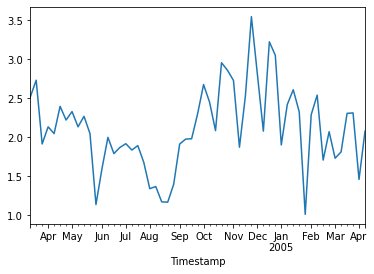

In [111]:
#plot average CO levels per week
df["CO(GT)"].resample("W").mean().plot()

In [112]:
#resample entire dataframe
df.resample("D").mean()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Timestamp,,,,,,,,,,,,,
2004-03-10,1.966667,1316.500000,86.500000,8.460790,912.250000,132.000000,1167.250000,108.833333,1545.333333,1096.041667,12.020833,54.883334,0.765626
2004-03-11,2.239130,1244.062500,104.500000,7.989058,851.802083,144.391304,1277.187500,99.869565,1522.697917,885.031250,9.833333,64.069791,0.775768
2004-03-12,2.804545,1281.562500,156.347826,12.129509,1008.229167,173.727273,1101.718750,116.272727,1627.218750,1084.218750,11.292708,51.107292,0.663102
2004-03-13,2.695652,1330.555556,139.250000,10.922887,992.822917,184.434783,993.159722,118.869565,1595.621528,1245.781250,12.866319,51.530903,0.732294
2004-03-14,2.469565,1360.927083,116.958333,9.631442,943.854167,146.608696,1001.104167,110.391304,1602.187500,1234.177083,16.016667,48.843750,0.849674
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-03-31,1.387500,1007.989583,NaN,5.226496,749.302083,184.991667,795.479167,100.637500,1176.468750,763.770833,17.554167,50.092708,0.951922
2005-04-01,1.108696,903.142361,NaN,3.416610,662.871528,161.766667,946.732639,107.208333,943.006944,523.868056,15.919792,35.959722,0.636536
2005-04-02,0.854167,890.895833,NaN,2.527522,616.197917,142.370833,991.697917,100.079167,864.260417,481.614583,15.489583,32.213542,0.546161


In [114]:
#resample specific columns
df.resample("D").agg({"CO(GT)":"mean",
                      "NO2(GT)":"sum",
                      "T":"max",
                      "RH":"count"
                      })

,CO(GT),NO2(GT),T,RH
Timestamp,,,,
2004-03-10,1.966667,653.0,13.600,6
2004-03-11,2.239130,2297.0,11.325,24
2004-03-12,2.804545,2558.0,16.875,24
2004-03-13,2.695652,2734.0,19.350,24
2004-03-14,2.469565,2539.0,22.225,24
...,...,...,...,...
2005-03-31,1.387500,2415.3,24.000,24
2005-04-01,1.108696,2573.0,19.925,24
2005-04-02,0.854167,2401.9,22.000,24
